<a href="https://colab.research.google.com/github/Nani0012/Lomba-Data-Analyst/blob/main/Lomba_TSDN_Tim_dadakan_dataVaksin.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **TAHAPAN**

1. Data Selection
2. Pre-processing/Cleaning
3. Transformation
4. Data Mining
5. Evaluation


Sumber data : https://drive.google.com/file/d/1hAXdXQAStHrEU2Ryn7DKVFKcVWvqaAw-/view?usp=sharing

data source data academy

# **LOAD LIBRARY PYTHON**


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

# **LOAD DATASET**

kita ubah kolom tangggal menjadi index colom untuk format waktu, agar mudah untuk dimanipulasi

In [ ]:
url = '/content/drive/MyDrive/Orbit/data-jumlah-vaksinasi-gotong-royong-menurut-kelurahan-di-provinsi-dki-jakarta-bulan-juli-tahun-2021.csv'
df = pd.read_csv(url, index_col='tanggal', usecols=['tanggal','wilayah_kota', 'kecamatan', 'kelurahan', 'dosis', 'jumlah_vaksin'])
df.head()

,wilayah_kota,kecamatan,kelurahan,dosis,jumlah_vaksin
tanggal,,,,,
2021-07-01,JAKARTA PUSAT,TANAH ABANG,BENDUNGAN HILIR,Dosis 1,118
2021-07-01,JAKARTA PUSAT,SENEN,BUNGUR,Dosis 1,75
2021-07-01,JAKARTA PUSAT,KEMAYORAN,CEMPAKA BARU,Dosis 1,132
2021-07-01,JAKARTA PUSAT,CEMPAKA PUTIH,CEMPAKA PUTIH BARAT,Dosis 1,179
2021-07-01,JAKARTA PUSAT,CEMPAKA PUTIH,CEMPAKA PUTIH TIMUR,Dosis 1,127


# **PRE-PROCESSIING / CLEANING**

In [ ]:
#Mengetahui jumlah kolom dan baris
#terdapat 16020 baris dan 6 kolom, 
df.shape

(16020, 5)

In [ ]:
#kita lakukan checking data
df.isnull().sum()

wilayah_kota     0
kecamatan        0
kelurahan        0
dosis            0
jumlah_vaksin    0
dtype: int64

In [ ]:
#Melihat informasi data, mulai dari jumlah data, tipe data, memory yang digunakan
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 16020 entries, 2021-07-01 to 2021-07-31
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   wilayah_kota   16020 non-null  object
 1   kecamatan      16020 non-null  object
 2   kelurahan      16020 non-null  object
 3   dosis          16020 non-null  object
 4   jumlah_vaksin  16020 non-null  int64 
dtypes: int64(1), object(4)
memory usage: 750.9+ KB


dataset tersebut tidak mempunyai missing value didalamnya. untuk kolom yang masih ber tipe data selain numerik, kita harus mengubahnya terlebih dahulu

In [ ]:
url = '/content/drive/MyDrive/Orbit/data-jumlah-vaksinasi-gotong-royong-menurut-kelurahan-di-provinsi-dki-jakarta-bulan-juli-tahun-2021.csv'
df_copy = pd.read_csv(url, usecols=['wilayah_kota', 'kecamatan', 'kelurahan', 'dosis', 'jumlah_vaksin'])
df_copy.head()

,wilayah_kota,kecamatan,kelurahan,dosis,jumlah_vaksin
0,JAKARTA PUSAT,TANAH ABANG,BENDUNGAN HILIR,Dosis 1,118
1,JAKARTA PUSAT,SENEN,BUNGUR,Dosis 1,75
2,JAKARTA PUSAT,KEMAYORAN,CEMPAKA BARU,Dosis 1,132
3,JAKARTA PUSAT,CEMPAKA PUTIH,CEMPAKA PUTIH BARAT,Dosis 1,179
4,JAKARTA PUSAT,CEMPAKA PUTIH,CEMPAKA PUTIH TIMUR,Dosis 1,127


In [ ]:
#Menggunakan encode untuk mengubah tipe data ke numerik

kolom = list(df_copy.columns[:4])

for col in kolom:
  df_copy[col].replace(list(df_copy[col].unique()),
                        [i for i in range(1,len(list(df_copy[col].unique())) + 1)],inplace = True)

df_copy.head()

,wilayah_kota,kecamatan,kelurahan,dosis,jumlah_vaksin
0,1,1,1,1,118
1,1,2,2,1,75
2,1,3,3,1,132
3,1,4,4,1,179
4,1,4,5,1,127


# **DATA EXPLORING**

In [ ]:
#Melihat statistical description dari data

df_copy.describe()

,wilayah_kota,kecamatan,kelurahan,dosis,jumlah_vaksin
count,16020.000000,16020.000000,16020.000000,16020.000000,16020.000000
mean,3.352060,22.670412,134.000000,1.500000,129.603620
std,1.439076,12.245231,77.078126,0.500016,109.819491
min,1.000000,1.000000,1.000000,1.000000,0.000000
25%,2.000000,13.000000,67.000000,1.000000,52.000000
50%,4.000000,23.000000,134.000000,1.500000,97.000000
75%,5.000000,33.000000,201.000000,2.000000,182.000000
max,6.000000,44.000000,267.000000,2.000000,834.000000


In [ ]:
#melihat statistika deskriptif data jumlah vaksin berdasarkan tanggal
grp2= df.groupby('tanggal')['jumlah_vaksin'].describe()
grp2.head()

,count,mean,std,min,25%,50%,75%,max
tanggal,,,,,,,,
2021-07-01,534.0,87.803371,80.582150,0.0,30.00,62.0,127.00,487.0
2021-07-02,534.0,91.552434,83.391457,0.0,32.00,65.0,132.75,493.0
2021-07-03,534.0,93.445693,84.577727,0.0,33.00,67.0,134.75,511.0
2021-07-04,534.0,97.093633,87.869353,0.0,34.25,70.0,139.00,615.0
2021-07-05,534.0,97.754682,88.449866,0.0,35.00,70.0,139.75,616.0


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


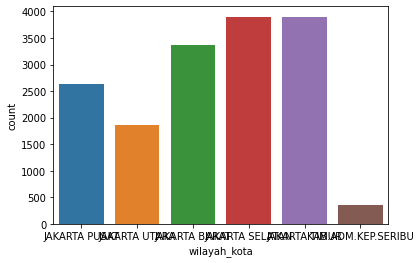

In [ ]:
#melihat univariate kolom wilayah_kota

sns.countplot(df.wilayah_kota)
plt.show()

In [ ]:
df.columns

Index(['wilayah_kota', 'kecamatan', 'kelurahan', 'dosis', 'jumlah_vaksin'], dtype='object')

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


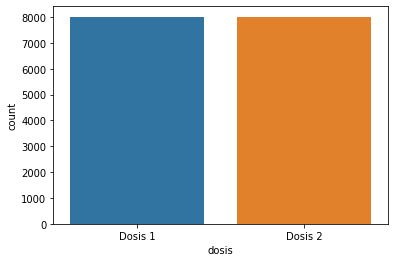

In [ ]:
#Melihat univariate kolom dosis
sns.countplot(df.dosis)
plt.show()

<Figure size 432x288 with 0 Axes>

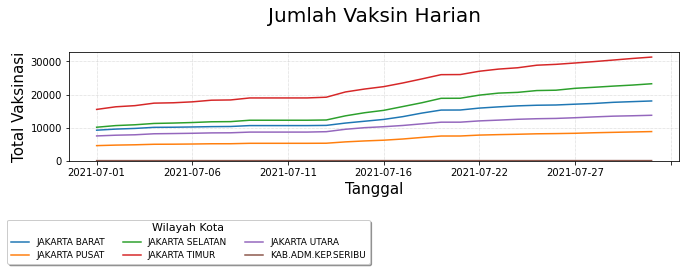

In [ ]:
#mengelompokan dataset berdasarkan tanggal dan wilayah kota membuat multiple line chart
plt.clf()
df.groupby(['tanggal','wilayah_kota'])['jumlah_vaksin'].sum().unstack().plot()
plt.title('Jumlah Vaksin Harian', loc='center', pad=30, fontsize=20,color='black')
plt.xlabel('Tanggal', fontsize=15)
plt.ylabel('Total Vaksinasi', fontsize=15)
plt.grid(color='darkgray', linestyle=':', linewidth=0.5)
plt.ylim(ymin=0)
plt.legend(loc='best', bbox_to_anchor=(0.5, -0.5), shadow=True, ncol=3,title='Wilayah Kota', fontsize=9, title_fontsize=11)
plt.gcf().set_size_inches(10,5)
plt.tight_layout()
plt.show()

In [ ]:
#df baru bernama df_pekan4, yang menunjukan jumlah vaksin
# di minggu ke 4

df_jaktim_pekan4 = df[(df['wilayah_kota'] == 'JAKARTA TIMUR') & (df.index >= '2021-07-24')]

df_jaktim_pekan4.head()

,wilayah_kota,kecamatan,kelurahan,dosis,jumlah_vaksin
tanggal,,,,,
2021-07-24,JAKARTA TIMUR,KRAMAT JATI,BALE KAMBANG,Dosis 1,157
2021-07-24,JAKARTA TIMUR,JATINEGARA,BALI MESTER,Dosis 1,71
2021-07-24,JAKARTA TIMUR,CIPAYUNG,BAMBU APUS,Dosis 1,116
2021-07-24,JAKARTA TIMUR,PASAR REBO,BARU,Dosis 1,109
2021-07-24,JAKARTA TIMUR,KRAMAT JATI,BATU AMPAR,Dosis 1,304


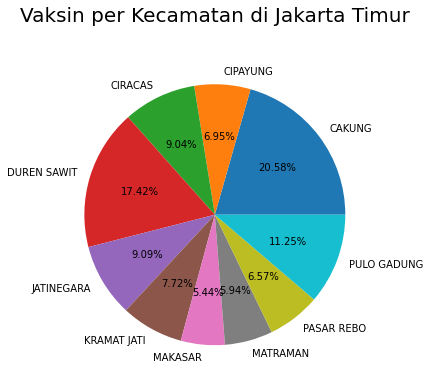

In [ ]:
vaksin_jaktim_per_kecamatan = df_jaktim_pekan4.groupby('kecamatan')['jumlah_vaksin'].sum().reset_index()
plt.figure(figsize=(6,6))
plt.pie(vaksin_jaktim_per_kecamatan['jumlah_vaksin'], labels = vaksin_jaktim_per_kecamatan['kecamatan'], autopct='%1.2f%%')
plt.title('Vaksin per Kecamatan di Jakarta Timur', loc='center', pad = 30, fontsize=20, color='black')
plt.show()

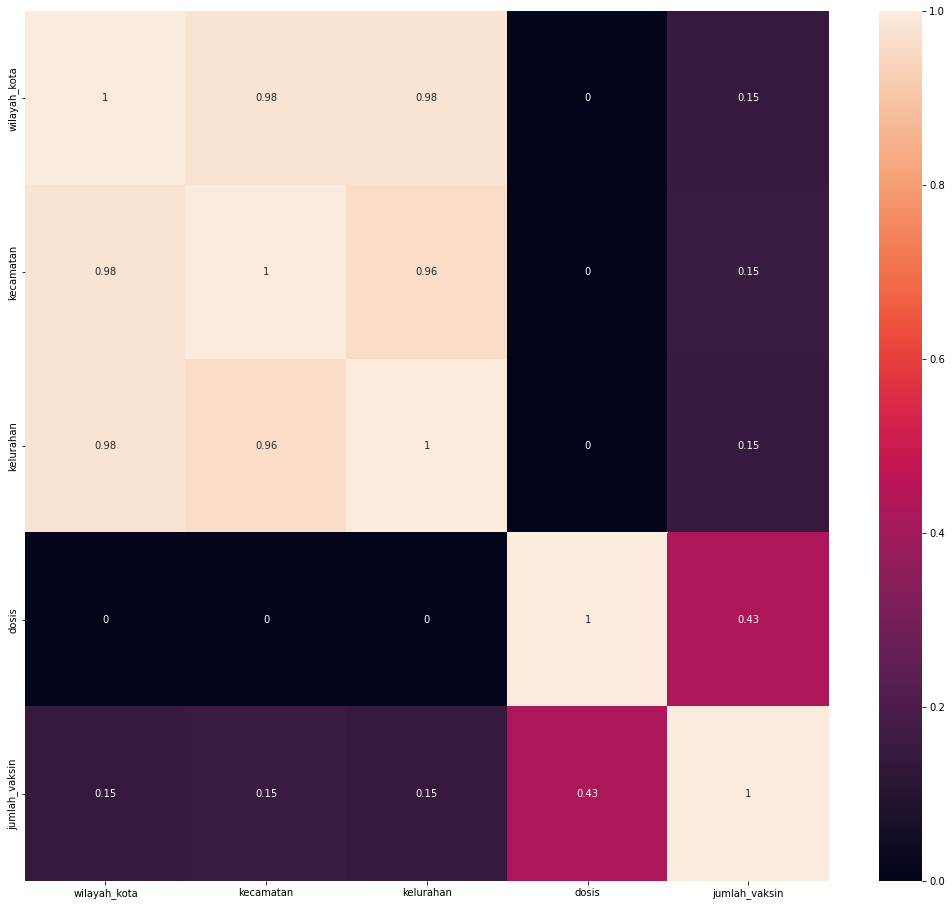

In [ ]:
#Mengetahui nilai korelasi dari independent variable dan dependent variable.
plt.figure(figsize=(18,16))
sns.heatmap(df_copy.corr(method='spearman').abs(), annot=True)

# **MODELING**

## **Data Spliting**

In [ ]:
x = df_copy.drop(columns='jumlah_vaksin').values
y = df_copy['jumlah_vaksin'].values

In [ ]:
x

array([[  1,   1,   1,   1],
       [  1,   2,   2,   1],
       [  1,   3,   3,   1],
       ...,
       [  6,  44, 265,   2],
       [  6,  44, 266,   2],
       [  6,  44, 267,   2]])

In [ ]:
y

array([118,  75, 132, ...,   0,   4,   3])

In [ ]:
#Split data menjadi train dan test dimana test dataset sebanyak 30%
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.15, random_state=42)

## **LINEAR REGRESSION**

In [ ]:
#buat model linear regression
lg = LinearRegression()

#train model yang sudah dibuat
lg.fit(x_train, y_train)

#cari tau nilai slope/koefisien dan intercept (b)

print(lg.coef_)
print(lg.intercept_)

[-2.14107800e+01  4.27578353e+00 -1.14878109e-02 -8.51972931e+01]
233.93377499327002


In [ ]:
pd.DataFrame({'Features':df_copy.columns[:4].to_list(),
              'coef_value':lg.coef_})

,Features,coef_value
0,wilayah_kota,-21.410780
1,kecamatan,4.275784
2,kelurahan,-0.011488
3,dosis,-85.197293


Dari nilai m dan b diatas, kalau dimasukan ke dalam rumus menjadi:
Y = -20.812311x1 + 4.317627x2  - 0.037430x3 - 84.726874x4

In [ ]:
#Keenam, cari tahu accuracy score dari model menggunakan testing data yang sudah displit.
lg.score(x_test, y_test)

0.1912914042703041

## **KNeighborsClassifier**

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
k = 3

knn = KNeighborsClassifier(n_neighbors = k).fit(x_train, y_train)
knn

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')

In [ ]:
from sklearn import metrics

y_predict = knn.predict(x_test)
print("Test set Accuracy : ", metrics.accuracy_score(y_test, y_predict))

Test set Accuracy :  0.09737827715355805


In [ ]:
Ks = 50
mean_acc = np.zeros((Ks))

for n in range(1,Ks+1):
  neigh = KNeighborsClassifier(n_neighbors= n).fit(x_train, y_train)
  y_predict = neigh.predict(x_test)
  mean_acc[n-1] = metrics.accuracy_score(y_test, y_predict)


mean_acc

array([0.08739076, 0.09030379, 0.09737828, 0.09821057, 0.10153974,
       0.1002913 , 0.10819809, 0.1127757 , 0.11652102, 0.12317936,
       0.12734082, 0.13316687, 0.1360799 , 0.1414898 , 0.14898044,
       0.14357054, 0.14606742, 0.15272576, 0.15189347, 0.15106117,
       0.15355805, 0.15022888, 0.14856429, 0.15022888, 0.15272576,
       0.15355805, 0.15563878, 0.15272576, 0.15147732, 0.15106117,
       0.14814815, 0.14440283, 0.14606742, 0.14440283, 0.14357054,
       0.1423221 , 0.14065751, 0.13774449, 0.13774449, 0.13399917,
       0.13399917, 0.13150229, 0.12567624, 0.12234707, 0.12151477,
       0.11652102, 0.10611735, 0.10153974, 0.09945901, 0.09654598])

In [ ]:
print("The best accuracy was with ", mean_acc.max(), "with k=", mean_acc.argmax()+1)

The best accuracy was with  0.155638784852268 with k= 27


## **KMEANS**

In [ ]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=5)
kmeans.fit(x)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=5, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [ ]:
print(kmeans.cluster_centers_)

[[  1.10204082   4.7755102   25.           1.5       ]
 [  4.26785714  29.51785714 183.5          1.5       ]
 [  2.5         14.63461538  75.5          1.5       ]
 [  5.10714286  38.58928571 239.5          1.5       ]
 [  3.44444444  23.03703704 128.5          1.5       ]]


In [ ]:
print(kmeans.labels_)

[0 0 0 ... 3 3 3]


# **DECISSION TREE**

In [ ]:

from sklearn.tree import DecisionTreeClassifier 
# Create Decision Tree classifer object
clf = DecisionTreeClassifier()

# Train Decision Tree Classifer
clf = clf.fit(x_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(x_test)

In [ ]:
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.155638784852268
